In [8]:
import nltk
with open("data/cather01.txt", "r") as f:
    catherStr = f.read()
catherTokens = nltk.word_tokenize(catherStr) # tokenize the words (without transformation)

In [9]:
catherPOS = nltk.pos_tag(catherTokens)

In [10]:
catherPOS[:22]

[('INTRODUCTION', 'NNP'),
 ('LAST', 'NNP'),
 ('summer', 'NN'),
 ('I', 'PRP'),
 ('happened', 'VBD'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('crossing', 'VBG'),
 ('the', 'DT'),
 ('plains', 'NNS'),
 ('of', 'IN'),
 ('Iowa', 'NNP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('season', 'NN'),
 ('of', 'IN'),
 ('intense', 'JJ'),
 ('heat', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD')]

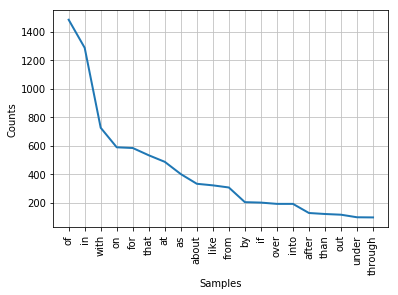

In [14]:
%matplotlib inline
catherAdj = [token for token, pos in catherPOS if "IN" == pos]
catherAdjFreqs = nltk.FreqDist(catherAdj)
catherAdjFreqs.plot(20)

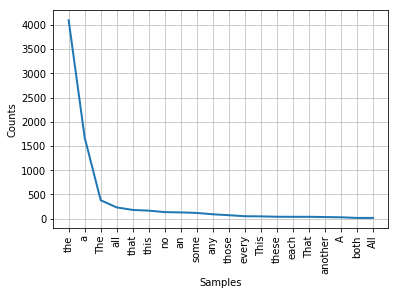

In [15]:
%matplotlib inline
catherAdj = [token for token, pos in catherPOS if "DT" == pos]
catherAdjFreqs = nltk.FreqDist(catherAdj)
catherAdjFreqs.plot(20)

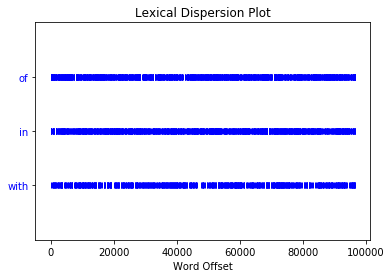

In [16]:
catherText = nltk.Text(catherTokens)
catherText.dispersion_plot(["of", "in", "with"])

   NN    IN   PRP   VBD    DT    JJ     ,   NNP     .    RB    CC   NNS    VB  PRP$    TO   VBN   VBP   VBG    MD    RP   WRB   VBZ     :    CD    WP 
12264  9898  8137  7993  7619  6087  5373  4981  4581  4506  3728  3505  3136  2525  2260  1653  1467  1387   768   700   700   656   640   468   335 


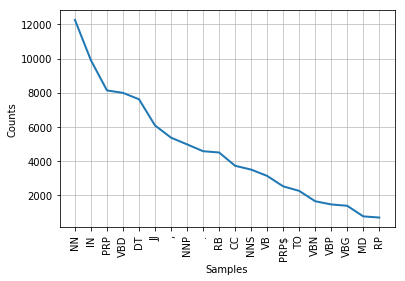

In [18]:
%matplotlib inline
catherTags = [pos for word, pos in catherPOS]
catherTagsFreqs = nltk.FreqDist(catherTags)
catherTagsFreqs.tabulate(25)
catherTagsFreqs.plot(20)

In [19]:
catherTagsNormalizedPunctuation = [pos if pos.isalpha() else "." for pos in catherTags]
nltk.FreqDist(catherTagsNormalizedPunctuation).tabulate(20)

    .    NN    IN   PRP   VBD    DT    JJ   NNP    RB    CC   NNS    VB    TO   VBN   VBP   VBG    MD    RP   WRB   VBZ 
13163 12264  9898  8137  7993  7619  6087  4981  4506  3728  3505  3136  2260  1653  1467  1387   768   700   700   656 


In [24]:
catherTagsNormalized = [pos[0:2] if pos.isalpha() else "." for pos in catherTags]
catherTagsNormalizedFreqs = nltk.FreqDist(catherTagsNormalized)
catherTagsNormalizedFreqs.tabulate(25)

   NN    VB     .    IN    PR    DT    JJ    RB    CC    TO    MD    RP    WR    CD    WP    WD    EX    PD    FW    UH    PO 
20795 16292 13163  9898  8137  7619  6364  4594  3728  2260   768   700   700   468   335   326   206   146    34    33     3 


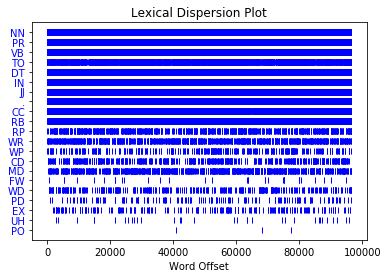

In [25]:
nltk.Text(catherTagsNormalized).dispersion_plot(list(catherTagsNormalizedFreqs.keys()))

In [27]:
print(catherPOS[12900:13035])

[('struck', 'VBD'), ('him', 'PRP'), ('fairly', 'RB'), ('across', 'IN'), ('the', 'DT'), ('neck', 'NN'), (',', ','), ('and', 'CC'), ('in', 'IN'), ('a', 'DT'), ('minute', 'NN'), ('he', 'PRP'), ('was', 'VBD'), ('all', 'DT'), ('about', 'IN'), ('my', 'PRP$'), ('feet', 'NNS'), ('in', 'IN'), ('wavy', 'JJ'), ('loops', 'NNS'), ('.', '.'), ('I', 'PRP'), ('struck', 'VBD'), ('now', 'RB'), ('from', 'IN'), ('hate', 'NN'), ('.', '.'), ('Antonia', 'NNP'), (',', ','), ('barefooted', 'VBD'), ('as', 'IN'), ('she', 'PRP'), ('was', 'VBD'), (',', ','), ('ran', 'VBD'), ('up', 'RP'), ('behind', 'IN'), ('me', 'PRP'), ('.', '.'), ('Even', 'RB'), ('after', 'IN'), ('I', 'PRP'), ('had', 'VBD'), ('pounded', 'VBN'), ('his', 'PRP$'), ('ugly', 'JJ'), ('head', 'NN'), ('flat', 'JJ'), (',', ','), ('his', 'PRP$'), ('body', 'NN'), ('kept', 'VBD'), ('on', 'IN'), ('coiling', 'NN'), ('and', 'CC'), ('winding', 'NN'), (',', ','), ('doubling', 'VBG'), ('and', 'CC'), ('falling', 'VBG'), ('back', 'RB'), ('on', 'IN'), ('itself', 'PR

In [28]:
catherInspect = catherStr.find("barefooted")
print(catherStr[catherInspect-100:catherInspect+300])

und the
tall asparagus, with its red berries, lying on the ground, a mass of
slimy green.

Tony was barefooted, and she shivered in her cotton dress and was
comfortable only when we were tucked down on the baked earth, in the
full blaze of the sun. She could talk to me about almost anything by
this time. That afternoon she was telling me how highly esteemed our
friend the badger was in her part of


In [29]:
catherPOSNormalized = [(word, pos[0:2] if pos.isalpha() else ".") for word, pos in catherPOS]


In [30]:
catherTagsNormalized = set([pos for word, pos in catherPOSNormalized]) # get unique pos tags
print(len(catherTagsNormalized))

21


In [35]:
catherTagsNormalizedAndFiltered = []
for currentpos in catherTagsNormalized:
    freqs = nltk.FreqDist([word.lower() for word, pos in catherPOSNormalized if currentpos == pos])
    if len(freqs)>2 and currentpos != ".":
        catherTagsNormalizedAndFiltered.append(currentpos)
print(catherTagsNormalizedAndFiltered)  

['UH', 'DT', 'CD', 'CC', 'RP', 'EX', 'FW', 'NN', 'WD', 'RB', 'PR', 'VB', 'WR', 'WP', 'IN', 'JJ', 'MD', 'PD']


In [36]:
len(catherTagsNormalizedAndFiltered)

18

In [37]:
import math

In [38]:
catherTagsGridRows = math.ceil(len(catherTagsNormalizedAndFiltered)/3)
catherTagsGridRows

6

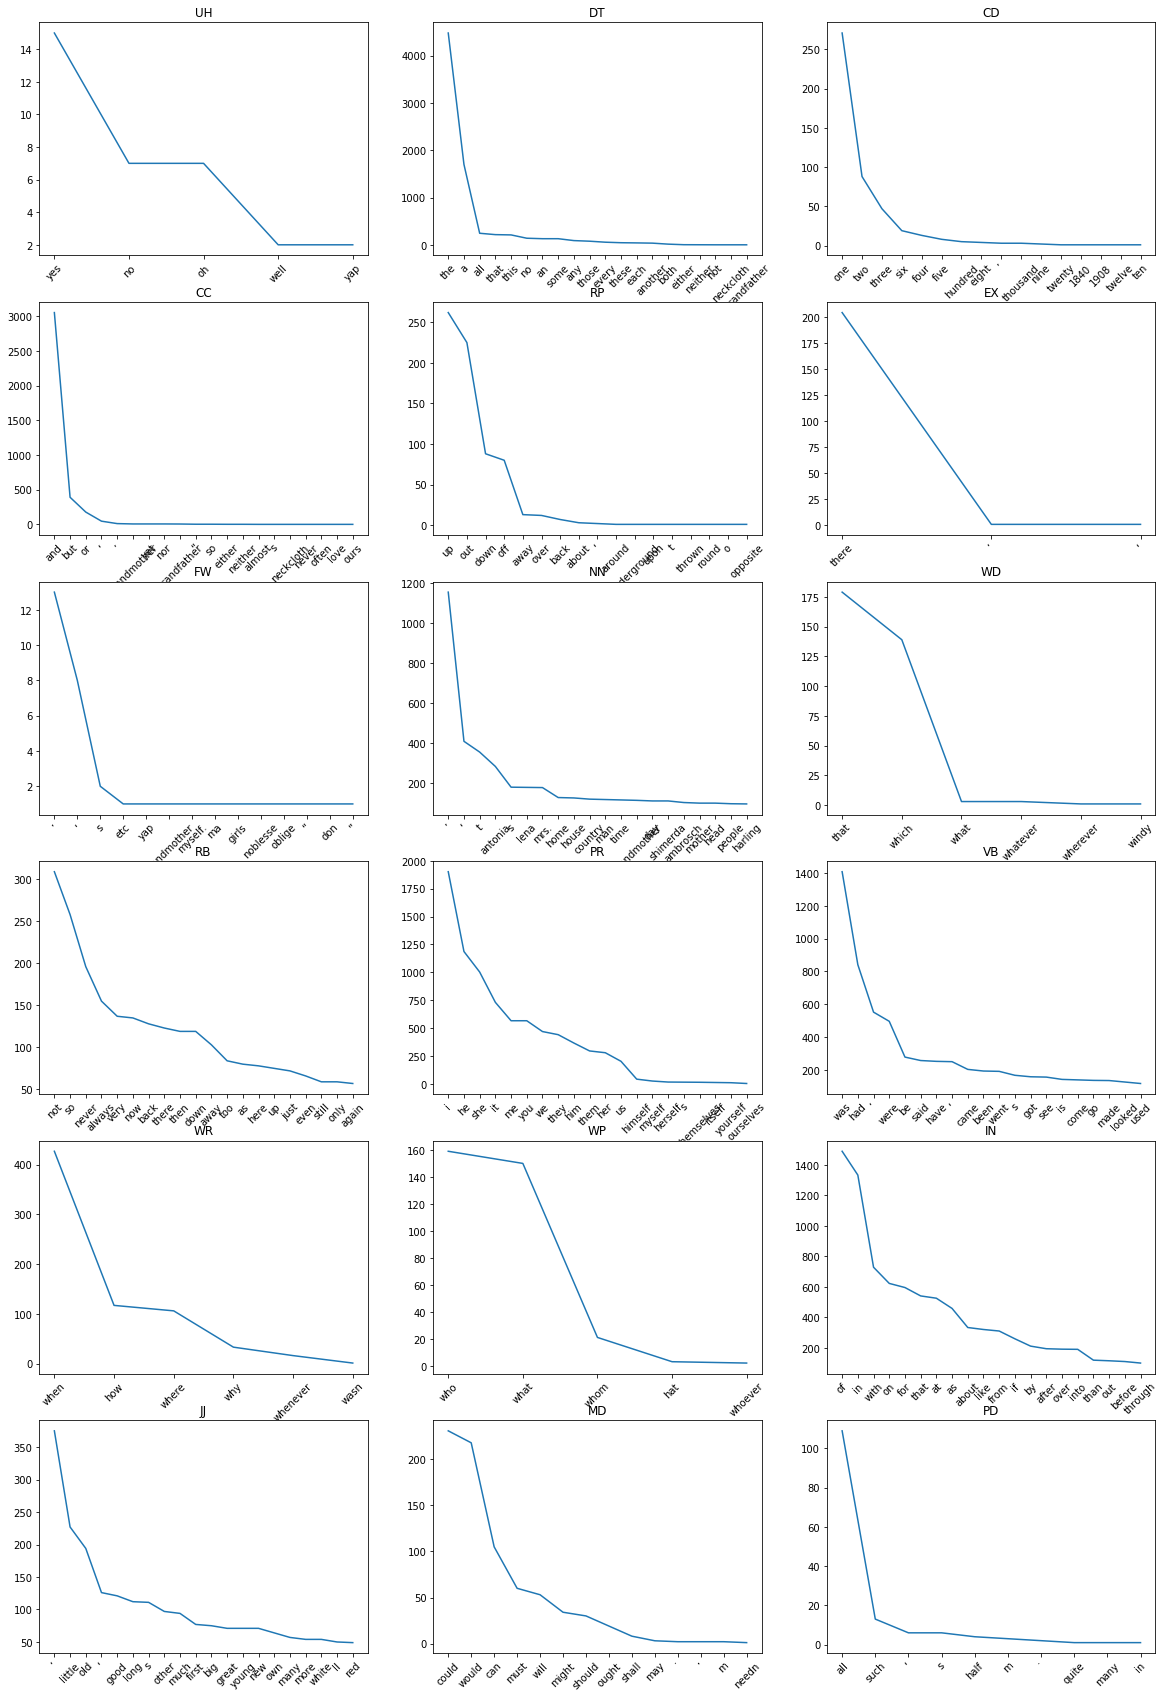

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(catherTagsGridRows, 3, figsize=(20, 30)) # define the number of row, columns, and overall size
for idx, currentpos in enumerate(catherTagsNormalizedAndFiltered): # this gives us an indexed enumeration 
    words = [word.lower() for word, pos in catherPOSNormalized if pos == currentpos] # count only current pos
    freqs = nltk.FreqDist(words).most_common(20) # take a subset of most common words
    plt.subplot(catherTagsGridRows, 3, (idx+1)) # select the grid location that corresponds to the index (of 14)
    plt.plot([count for token, count in freqs]) # plot the counts
    plt.xticks(range(len(freqs)), [token for token, count in freqs], rotation=45) # plot the words
    plt.title(currentpos) # set the title

In [41]:
for fileid in nltk.corpus.gutenberg.fileids():
    text = nltk.corpus.gutenberg.raw(fileid) # raw() reads in the string
    length = len(text)
    print(fileid + ":", '{:,}'.format(length))

austen-emma.txt: 887,071
austen-persuasion.txt: 466,292
austen-sense.txt: 673,022
bible-kjv.txt: 4,332,554
blake-poems.txt: 38,153
bryant-stories.txt: 249,439
burgess-busterbrown.txt: 84,663
carroll-alice.txt: 144,395
chesterton-ball.txt: 457,450
chesterton-brown.txt: 406,629
chesterton-thursday.txt: 320,525
edgeworth-parents.txt: 935,158
melville-moby_dick.txt: 1,242,990
milton-paradise.txt: 468,220
shakespeare-caesar.txt: 112,310
shakespeare-hamlet.txt: 162,881
shakespeare-macbeth.txt: 100,351
whitman-leaves.txt: 711,215


In [42]:
def get_percentage_pos(string, pos):
    tokens = nltk.word_tokenize(string)
    tagged = nltk.pos_tag(tokens)
    matching_tagged = [word for word, p in tagged if pos == p]
    return len(matching_tagged) / len(tagged)

In [43]:
whitmanStr = nltk.corpus.gutenberg.raw("whitman-leaves.txt")
print("Leaves of Grass has", '{:.2%}'.format(get_percentage_pos(whitmanStr, "IN")), "prepositions")
print("My Antonia has", '{:.2%}'.format(get_percentage_pos(catherStr, "IN")), "prepositions")

Leaves of Grass has 9.74% prepositions
My Antonia has 10.25% prepositions
